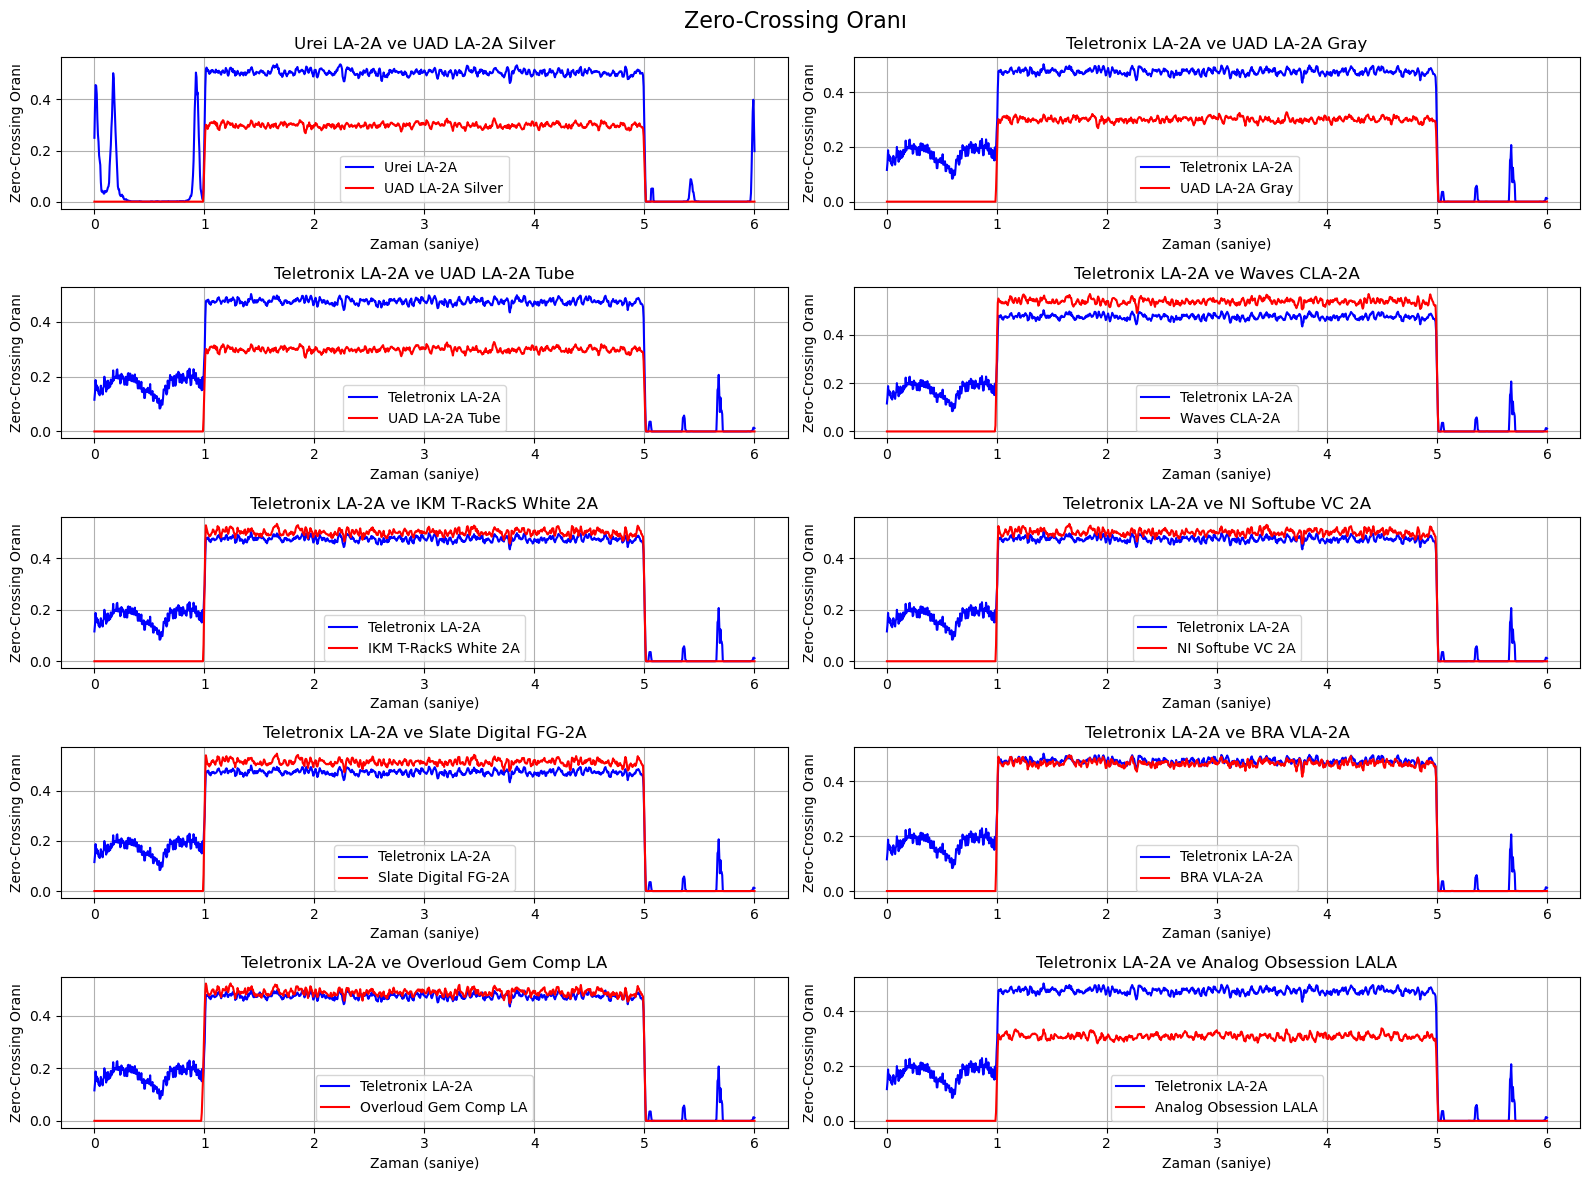

In [17]:
# ZCR, bir ses sinyalinin sıfırdan geçiş sayısını (pozitiften negatife veya negatiften pozitife geçişler) hesaplar. 
# Özellikle bir sesin perkusif (vuruşlu) mi, sürekli mi, veya gürültü tabanlı mı, tonal mi olduğunu anlamak için kullanılır.
# Y ekseni, sinyalin sıfır geçişlerinin çerçeve içindeki toplam örnek sayısına oranıdır ve genelde 0 ile 1 arasında bir ölçek içinde hesaplanır.

# White Noise
# Uygunluk: Çok Yüksek.
# White noise, genlik spektrumunda her frekansta eşit enerji içerir ve sıfır geçişleri rastgeledir.
# Gürültü tabanlı veya perkusif yapıları analiz etmek için çok uygundur çünkü sistemin ZCR özelliklerini anlamak için geniş bir veri sağlar.
    
# Gerekli kütüphanelerin yüklenmesi
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/processed/teletronix_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/urei_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_gray_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_silver_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/uad_tube_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/waves_cla-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ikm_white-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ni_softube_vc-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ss_fg-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/bra_vla-2a_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/overloud_gem-comp-la_white_noise.wav",
    "/Users/nazimerensahin/Desktop/processed/ao_lala_white_noise.wav",
]

# Ses dosyalarının isimlendirilmesi
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Teletronix LA-2A için referans dalgaları
teletronix_wave, teletronix_sr = librosa.load(audio_files[0], sr=None)
teletronix_zcr = librosa.feature.zero_crossing_rate(teletronix_wave)[0]
teletronix_time = librosa.times_like(teletronix_zcr, sr=teletronix_sr)

# Urei LA-2A ve UAD LA-2A Silver karşılaştırması
urei_wave, urei_sr = librosa.load(audio_files[1], sr=None)
urei_zcr = librosa.feature.zero_crossing_rate(urei_wave)[0]
urei_time = librosa.times_like(urei_zcr, sr=urei_sr)

silver_wave, silver_sr = librosa.load(audio_files[3], sr=None)
silver_zcr = librosa.feature.zero_crossing_rate(silver_wave)[0]
silver_time = librosa.times_like(silver_zcr, sr=silver_sr)

# Grafik ayarları
plt.figure(figsize=(16, 12))
plot_idx = 1

# 1. Grafik: Urei LA-2A ve UAD LA-2A Silver
plt.subplot(5, 2, plot_idx)
plt.plot(urei_time, urei_zcr, color="blue", label=audio_labels[1])
plt.plot(silver_time, silver_zcr, color="red", label=audio_labels[3])
plt.title(f"{audio_labels[1]} ve {audio_labels[3]}")
plt.xlabel("Zaman (saniye)")
plt.ylabel("Zero-Crossing Oranı")
plt.legend()
plt.grid()
plot_idx += 1

# İkinci ve Sonrası: Teletronix LA-2A ile diğer pluginler
for idx, (file_path, label) in enumerate(zip(audio_files[2:], audio_labels[2:]), start=2):
    if label in [audio_labels[1], audio_labels[3]]:  # Urei ve Silver zaten karşılaştırıldı
        continue

    # Diğer ses dosyasını yükleme
    other_wave, other_sr = librosa.load(file_path, sr=None)
    other_zcr = librosa.feature.zero_crossing_rate(other_wave)[0]
    other_time = librosa.times_like(other_zcr, sr=other_sr)

    # Karşılaştırma grafiği
    plt.subplot(5, 2, plot_idx)
    plt.plot(teletronix_time, teletronix_zcr, color="blue", label=audio_labels[0])
    plt.plot(other_time, other_zcr, color="red", label=label)
    plt.title(f"{audio_labels[0]} ve {label}")
    plt.xlabel("Zaman (saniye)")
    plt.ylabel("Zero-Crossing Oranı")
    plt.legend()
    plt.grid()
    plot_idx += 1

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Zero-Crossing Oranı", fontsize=16)
plt.show()
